Implementing an MST algorithm.

1. Load example graphs and programmatically count their nodes and edges. ***NOTE:*** If you are using Google CoLab, you will have to click the file folder icon on the left, then click the file folder icon with an up arrow on it and select import into this environment the graphs.zip file. Using any graph representation you wish, I am choosing adjacency lists. For each graph, you code should determine both the number of nodes and the number of edges.

Deliverable 1: A table which reports the exact number of nodes and edges for each of the 30 graphs.

In [ ]:
import pandas as pd
import zipfile

adjacency_lists_t1 = {}
adjacency_lists_t2 = {}
adjacency_lists_t3 = {}

adjacency_matrix_t3 = {}

graph_info_table = []

def adjacency_matrix_to_list(df):
  df = df.apply(pd.to_numeric, errors='coerce')
  df = df.fillna(-1)
  df = df.reset_index(drop=True)
  adjacency_list = {node: [] for node in df.index} # nodes defined corr. per row entry
  for i in range(len(df)):
    for j in range(i, len(df.columns)):
      if df.iloc[i, j] >= 0:
        adjacency_list[i].append((df.iloc[i, j], j))  # Add edge from i to j
        adjacency_list[j].append((df.iloc[i, j], i))  # Add edge from j to i (since undirected)
  return adjacency_list

# for type 3 only
import pandas as pd

def adjacency_list_to_matrix(adj_list):
  # number of nodes is the highest index in adjacency list
  num_nodes = max(adj_list.keys()) + 1

  # initialize an empty DataFrame
  matrix = pd.DataFrame(-1, index=range(num_nodes), columns=range(num_nodes))

  # populate the DataFrame
  for node, edges in adj_list.items():
    for weight, connected_node in edges:
      matrix.at[node, connected_node] = weight
      if node != connected_node:  # mirror the edge bc undirected
        matrix.at[connected_node, node] = weight

  return matrix


def calculate_nodes_and_edges(adjacency_list):
  total_nodes = len(adjacency_list)
  #count the path values for all paths  in the adjacency list undirected
  total_edges = sum(len(edges) for edges in adjacency_list.values())// 2
  return total_nodes, total_edges

with zipfile.ZipFile('/graphs.zip', 'r') as z:
  count_t1 = 0
  count_t2 = 0
  count_t3 = 0
  graph_info_idx = 0

  for filename in z.namelist():
    if filename.endswith('.csv'):
      #unzipping and looking at all files in the zipped folder
      with z.open(filename) as f:
        #read the given csv into a dataframe (df)
        df = pd.read_csv(f, header=None, sep= ',', encoding= 'latin1')
        df.set_index(0, inplace= True)

        if 'type_1' in filename:
          adjacency_lists_t1[filename] = adjacency_matrix_to_list(df)
          nodes, edges = calculate_nodes_and_edges(adjacency_lists_t1[filename])
          graph_info_table.append({'Type': 'T1', 'Graph': filename,
                             'Nodes' : nodes,
                             'Edges' : edges})
          graph_info_idx += 1
          count_t1 += 1
        elif 'type_2' in filename:
          adjacency_lists_t2[filename] = adjacency_matrix_to_list(df)
          nodes, edges = calculate_nodes_and_edges(adjacency_lists_t2[filename])
          graph_info_table.append({'Type': 'T2', 'Graph': filename,
                             'Nodes' : nodes,
                             'Edges' : edges})
          graph_info_idx += 1
          count_t2 += 1
        elif 'type_3' in filename:
          adjacency_lists_t3[filename] = adjacency_matrix_to_list(df)
          nodes, edges = calculate_nodes_and_edges(adjacency_lists_t3[filename])
          graph_info_table.append({'Type': 'T3', 'Graph': filename,
                             'Nodes' : nodes,
                             'Edges' : edges})
          graph_info_idx += 1
          count_t3 += 1


graph_df = pd.DataFrame(graph_info_table)
sorted_graph_df = graph_df.sort_values(by= "Graph")
print(sorted_graph_df.to_string(index = False))

Type                 Graph  Nodes  Edges
  T1 type_1/t1_graph_0.csv     10     17
  T1 type_1/t1_graph_1.csv     20    106
  T1 type_1/t1_graph_2.csv     30    299
  T1 type_1/t1_graph_3.csv     40    584
  T1 type_1/t1_graph_4.csv     50    971
  T1 type_1/t1_graph_5.csv     60   1447
  T1 type_1/t1_graph_6.csv     70   2029
  T1 type_1/t1_graph_7.csv     80   2729
  T1 type_1/t1_graph_8.csv     90   3511
  T1 type_1/t1_graph_9.csv    100   4384
  T2 type_2/t2_graph_0.csv     10     45
  T2 type_2/t2_graph_1.csv     20    172
  T2 type_2/t2_graph_2.csv     30    336
  T2 type_2/t2_graph_3.csv     40    505
  T2 type_2/t2_graph_4.csv     50    683
  T2 type_2/t2_graph_5.csv     60    898
  T2 type_2/t2_graph_6.csv     70   1067
  T2 type_2/t2_graph_7.csv     80   1296
  T2 type_2/t2_graph_8.csv     90   1504
  T2 type_2/t2_graph_9.csv    100   1675
  T3 type_3/t3_graph_0.csv     10     17
  T3 type_3/t3_graph_1.csv     20     40
  T3 type_3/t3_graph_2.csv     30     56
  T3 type_3/t3_g

Deliverable 2: Determine whether the graphs are sparse or dense. For each of the three types, provide your conjecture about whether the type is sparse (|E| in O(|V|)) or dense (|E| in Theta(|V|^2). Provide your conjecture for all three. Support your conjecture using plots or some other means.

Conjecture: T1 graphs are dense, T2 graphs are sparse, and T3 graphs are sparse.

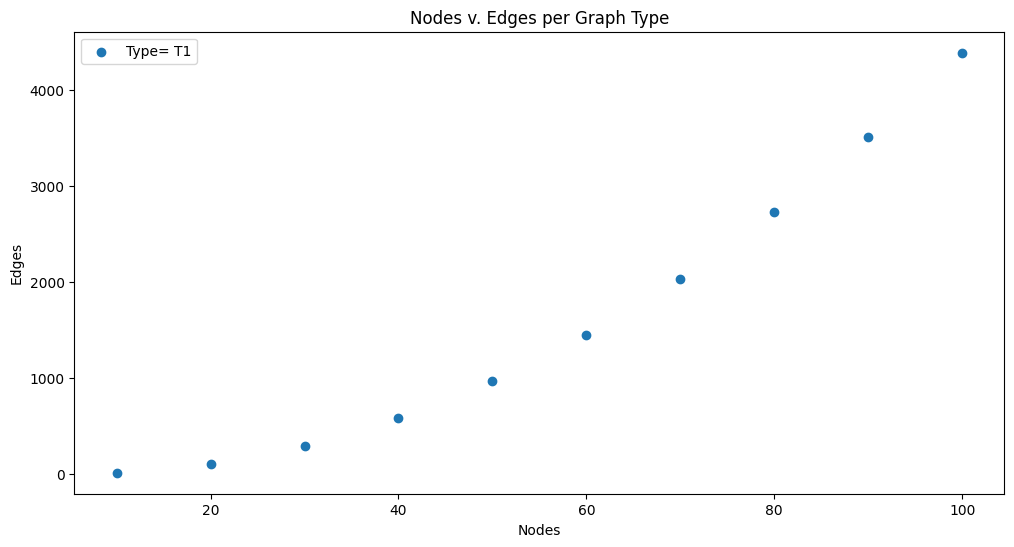

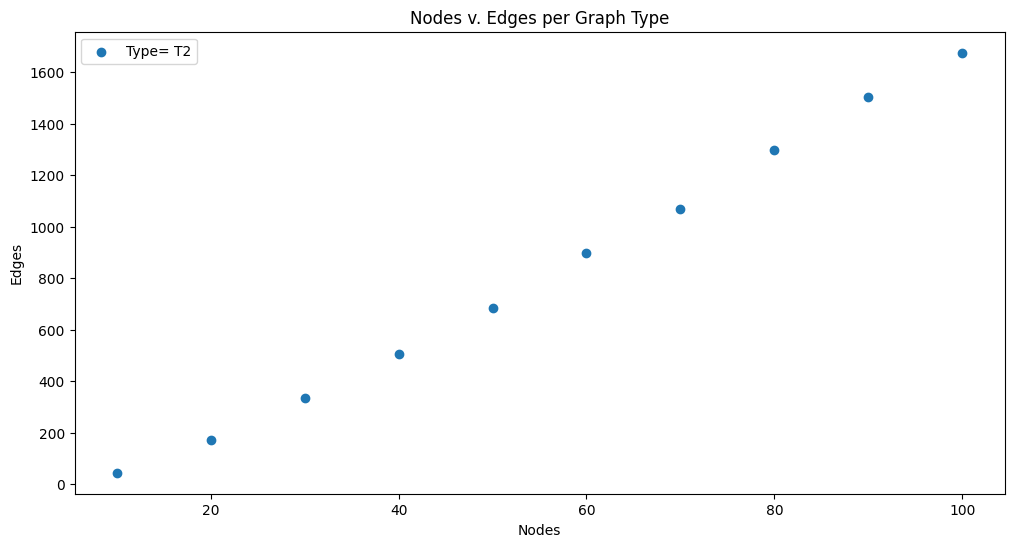

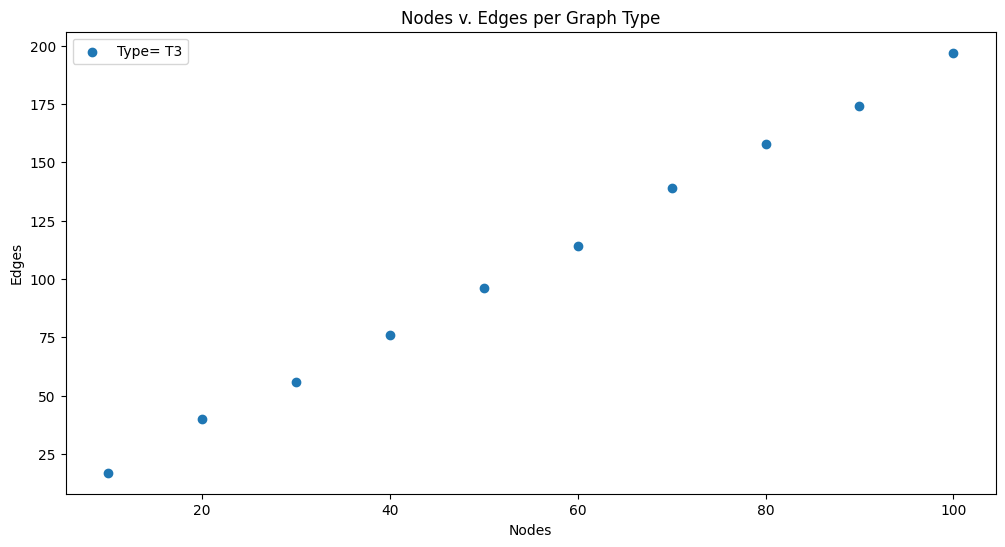

In [ ]:
import matplotlib.pyplot as plt
nodes_and_edges_by_type = {}

for graph in graph_info_table:
  graph_type = graph['Type']

  if graph_type not in nodes_and_edges_by_type:
    nodes_and_edges_by_type[graph_type] = []

  #add in nodes and edges respective to graph type
  nodes_and_edges_by_type[graph_type].append((graph['Nodes'], graph['Edges']))

#we've formed a collection of nodes and edges, now let's plot them respective to type
for graph_type, node_edge_pairs in nodes_and_edges_by_type.items():

  nodes_list = []
  edges_list = []

  for pair in node_edge_pairs:
    nodes_list.append(pair[0])
    edges_list.append(pair[1])

  #plot

  plt.figure(figsize = (12,6))
  plt.xlabel('Nodes')
  plt.ylabel('Edges')
  plt.title('Nodes v. Edges per Graph Type')
  plt.scatter(nodes_list, edges_list, label=f'Type= {graph_type}')
  plt.legend()
#three separate plots

As you can see here, T1 graphs resemble a polynomial curve with leading coefficient n^2. So E in Theta(|V|^2) seems to be the case which means T1 graphs are dense.  T2, T3 graphs resemble a linear relationship between edges and vertices, so E in O(|V|). So T2,T3 graphs are sparse.

Deliverable 3: Implement 2 distinct algorithms to determing the Minimum Spanning Tree of a Graph.
Since everything is stored in an adjacency list, we will implement Prim's and Kruskal's using adjacency lists.

In [ ]:
import heapq as hq

#adjacency list implementation

def AlgoPrim(G):
  # start with vertex 0
  start_node = 0 #this choice is not so arbitrary if you're dealing with a forest... foreshadowing!
  vertices_in_tree = set([start_node]) #plop in our start node
  #build our heap
  edge_heap = [(weight, start_node, end_node) for weight, end_node in G[start_node]]
  hq.heapify(edge_heap)
  total_weight = 0 #count the total weight

  while edge_heap and  len(vertices_in_tree) < len(G):
    weight, start_node, end_node = hq.heappop(edge_heap)

    # check if the node is already in the MST
    if end_node in vertices_in_tree:
      continue

    vertices_in_tree.add(end_node)
    total_weight += weight

    # add new edges to the heap
    for next_weight, next_end in G[end_node]:
      if next_end not in vertices_in_tree:
          hq.heappush(edge_heap, (next_weight, end_node, next_end))

  return total_weight

#print(AlgoPrim(adjacency_lists_t1['type_1/t1_graph_0.csv'])) verifying line if necessary

50.0


In [ ]:
import heapq as hq
import pandas as pd

def AlgoPrimMatrix(G):
  start_node = 0 #"arbitrary" choice that greatly influences outcomes
  vertices_in_tree = set([start_node])
  edge_heap = []
  num_nodes = len(G)

  # add initial edges from the start node
  for end_node in range(num_nodes):
    weight = G[start_node][end_node]
    if weight >= 0:  # -1 is no edge in b/w in matrix implementation
      hq.heappush(edge_heap, (weight, start_node, end_node))

  hq.heapify(edge_heap)
  total_weight = 0

  while edge_heap and len(vertices_in_tree) < num_nodes:
    #pop off the min value from the heap
    weight, start_node, end_node = hq.heappop(edge_heap)

    if end_node in vertices_in_tree:
      #if it's in the tree already loop again and pop off the next min
      continue

    # otherwise, add our new edge to the tree
    vertices_in_tree.add(end_node)
    total_weight += weight

    # add new edges to the heap
    for next_end in range(num_nodes):
      next_weight = G[end_node][next_end]
      if next_weight >= 0 and next_end not in vertices_in_tree:
        # place new set of edges corresponding to new node in the heap
        hq.heappush(edge_heap, (next_weight, end_node, next_end))

  return total_weight


In [ ]:
import heapq as hq
# Kruskal's Algo implementation
class DisjointSet:
  #keep track of subtrees
  def __init__(self, n):
    self.parent = list(range(n)) #where the tree starts
    self.rank = [0] * n # how big is the tree

  def find(self, i):
    #try to locate the root node in the tree
      if self.parent[i] != i:
          #recursively call until we find root node
          self.parent[i] = self.find(self.parent[i])
      return self.parent[i]

  def union(self, x, y):
    root_x = self.find(x)
    root_y = self.find(y)
    if root_x != root_y:
      #if the new node in question is not in the tree, add it to the tree and increment tree size
      if self.rank[root_x] < self.rank[root_y]:
          #swap the trees of larger and smaller ranks
          root_x, root_y = root_y, root_x
      self.parent[root_y] = root_x #merge the tree with the smaller rank into the larger
      self.rank[root_y] += self.rank[root_x]

def AlgoKruskal(G):

  nodes = len(G)
  dsu = DisjointSet(nodes) #keep track of our cycles/ subtrees
  final_tree = []
  total_weight = 0

  # Priority queue for the edges
  edge_heap = []
  for start_node, edges in G.items():
    for edge_weight, end_node in edges:
      #shove everything into a min heap
      hq.heappush(edge_heap, (edge_weight, start_node, end_node))

  while edge_heap and len(final_tree) < nodes - 1:
    #go until min tree is found
    edge_weight, start_node, end_node = hq.heappop(edge_heap)
    if dsu.find(start_node) != dsu.find(end_node):
        #if no cycles are created add the new min weight edge to the tree
        dsu.union(start_node, end_node)
        final_tree.append((edge_weight, start_node, end_node))
        total_weight += edge_weight
  num_edges = len(final_tree) #used later for graphing
  return num_edges, total_weight


# print(AlgoKruskal(adjacency_lists_t1['type_1/t1_graph_0.csv'])) used for verification

In [ ]:
#generate the weights table
graph_info_table = []
graph_info_table_prim = []
for (graph1_name, graph1_data), (graph2_name, graph2_data), (graph3_name, graph3_data) in zip(adjacency_lists_t1.items(), adjacency_lists_t2.items(), adjacency_lists_t3.items()):
  prim_weight1 = AlgoPrim(graph1_data)
  kruskal_weight1 = AlgoKruskal(graph1_data)
  graph_info_table.append({'Type': 'T1', 'Graph': graph1_name, 'Weight Prims': prim_weight1, 'Weight Kruskal' : kruskal_weight1[1]})

  prim_weight2 = AlgoPrim(graph2_data)
  kruskal_weight2 = AlgoKruskal(graph2_data)
  graph_info_table.append({'Type': 'T2', 'Graph': graph2_name, 'Weight Prims': prim_weight2, 'Weight Kruskal' : kruskal_weight2[1]})

  prim_weight3 = AlgoPrim(graph3_data)
  prim_weight3_mat = AlgoPrimMatrix(adjacency_list_to_matrix(graph3_data))
  kruskal_weight3 = AlgoKruskal(graph3_data)
  graph_info_table_prim.append({'Type': 'T3', 'Graph': graph3_name, 'Weight Prims Adj List': prim_weight3, 'Weight Prims Matrix' : prim_weight3_mat})
  graph_info_table.append({'Type': 'T3', 'Graph': graph3_name, 'Weight Prims': prim_weight3, 'Weight Kruskal' : kruskal_weight3[1]})

graph_df = pd.DataFrame(graph_info_table)
sorted_graph_df = graph_df.sort_values(by= 'Graph')
print(sorted_graph_df.to_string(index = False))

Type                 Graph  Weight Prims  Weight Kruskal
  T1 type_1/t1_graph_0.csv          50.0            50.0
  T1 type_1/t1_graph_1.csv          98.0            98.0
  T1 type_1/t1_graph_2.csv         108.0           108.0
  T1 type_1/t1_graph_3.csv         125.0           125.0
  T1 type_1/t1_graph_4.csv         136.0           136.0
  T1 type_1/t1_graph_5.csv         170.0           170.0
  T1 type_1/t1_graph_6.csv         183.0           183.0
  T1 type_1/t1_graph_7.csv         215.0           215.0
  T1 type_1/t1_graph_8.csv         244.0           244.0
  T1 type_1/t1_graph_9.csv         246.0           246.0
  T2 type_2/t2_graph_0.csv          20.0            20.0
  T2 type_2/t2_graph_1.csv          27.0            27.0
  T2 type_2/t2_graph_2.csv          30.0            30.0
  T2 type_2/t2_graph_3.csv          40.0            40.0
  T2 type_2/t2_graph_4.csv          51.0            51.0
  T2 type_2/t2_graph_5.csv          60.0            60.0
  T2 type_2/t2_graph_6.csv     

The results for Prim's and Kruskal's algorithm diverge on type 3 graphs, but I have verifified that this is due to the "arbitrary" choice of the start node that is causing this discrepancy. Some nodes are not fully connected to the graph. Rather, some of these graphs are forests not fully connected graphs. Take for example graph type_3/t3_graph_8.csv. The cheapest and only connection to node 0 is node 88. Node 88 is only connected to node 0. The function terminates and the minimum spanning tree is left with one connection. If you play with the start node, other graphs have nodes not connected to the tree at all which leads to a total MST weight of 0. By changing the start node of prims algorithm, graphs of type 3 yield different results than Kruskal's which I would argue provides the truest solution given some of these graphs are forests. I will leave the proof of this as an exercise for the reader :)

In [ ]:
print("\n\t\t\tPOINT PROVING: \n")
prim_graph_df = pd.DataFrame(graph_info_table_prim)
sorted_prim_graph = prim_graph_df.sort_values(by = 'Graph')
print(sorted_prim_graph.to_string(index = False))
# print(adjacency_lists_t3['type_3/t3_graph_8.csv']) look at what I'm talking about


			POINT PROVING: 

Type                 Graph  Weight Prims Adj List  Weight Prims Matrix
  T3 type_3/t3_graph_0.csv                   18.0                   18
  T3 type_3/t3_graph_1.csv                   79.0                   79
  T3 type_3/t3_graph_2.csv                   91.0                   91
  T3 type_3/t3_graph_3.csv                  125.0                  125
  T3 type_3/t3_graph_4.csv                  157.0                  157
  T3 type_3/t3_graph_5.csv                  216.0                  216
  T3 type_3/t3_graph_6.csv                  203.0                  203
  T3 type_3/t3_graph_7.csv                  291.0                  291
  T3 type_3/t3_graph_8.csv                    6.0                    6
  T3 type_3/t3_graph_9.csv                  362.0                  362


Deliverable 4: Estimate the time complexity of your implementations for each of the 3 types of graphs. Support your esgtimate using plots or some other means. Make sure yoru conclusions are directly and clearly supported by the results of your experiments.

In [ ]:
#Runtime Calculation per graph type
import time

runtime_prim_t1 = {}
runtime_prim_t2 = {}
runtime_prim_t3 = {}

runtime_kruskal_t1 = {}
runtime_kruskal_t2 = {}
runtime_kruskal_t3 = {}

runtime_prim_mat_t1 = {}
runtime_prim_mat_t2 = {}
runtime_prim_mat_t3 = {}

start_time = time.time_ns()
end_time = time.time_ns()
#come back and name graphs
for graph1, graph2, graph3 in zip(adjacency_lists_t1.values(), adjacency_lists_t2.values(), adjacency_lists_t3.values()):
  vertices = len(graph1)
  start_time = time.time_ns()
  _ = AlgoPrim(graph1)
  end_time = time.time_ns()
  runtime_prim_t1[vertices] = (end_time - start_time)

  vertices = len(graph2)
  start_time = time.time_ns()
  _ = AlgoPrim(graph2)
  end_time = time.time_ns()
  runtime_prim_t2[vertices] = (end_time - start_time)

  vertices = len(graph3)
  start_time = time.time_ns()
  _ = AlgoPrim(graph3)
  end_time = time.time_ns()
  runtime_prim_t3[vertices] = (end_time - start_time)

  start_time = time.time_ns()
  edges, _ = AlgoKruskal(graph1)
  end_time = time.time_ns()
  runtime_kruskal_t1[edges] = (end_time - start_time)

  start_time = time.time_ns()
  edges, _ = AlgoKruskal(graph2)
  end_time = time.time_ns()
  runtime_kruskal_t2[edges] = (end_time - start_time)

  start_time = time.time_ns()
  edges, _ = AlgoKruskal(graph3)
  end_time = time.time_ns()
  runtime_kruskal_t3[edges] = (end_time - start_time)

  mat1 = adjacency_list_to_matrix(graph1)
  mat2 = adjacency_list_to_matrix(graph2)
  mat3 = adjacency_list_to_matrix(graph3)

  start


Runtime of Prim's plotted. Remember that Prim's algorithm using adjacency lists runs in Theta(|E|log(|V|)). I will choose to plot with vertices because I like them better.

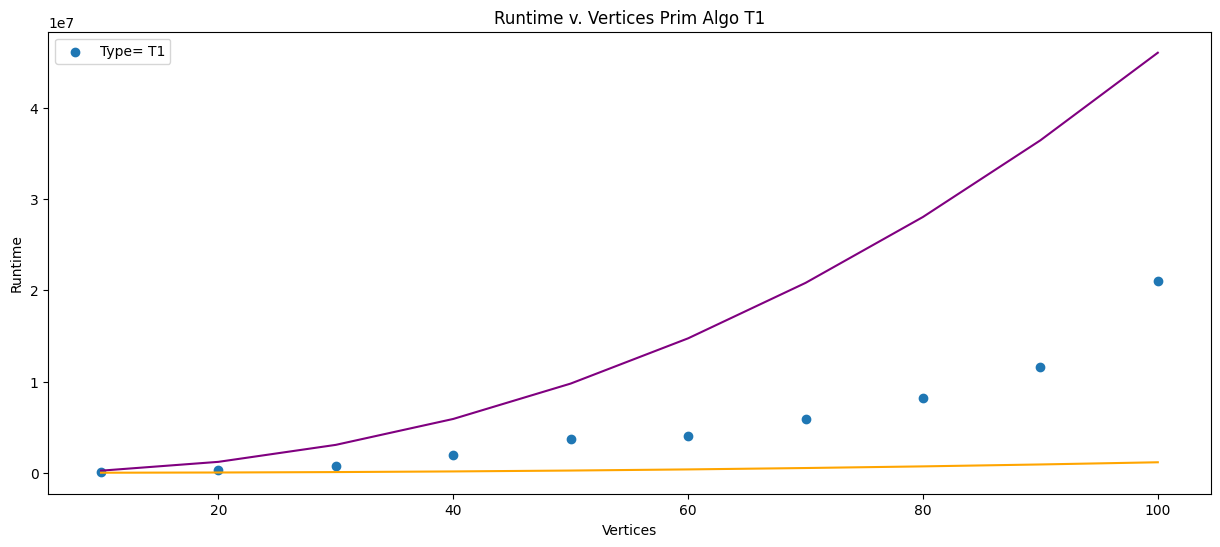

In [ ]:
import matplotlib.pyplot as plt
import math
n = [i*10 for i in range(1,11)]
upper_lim = []
lower_lim = []

for vertex in n:
  # v^2 log v scaled
  upper_lim.append(1000 * (pow(vertex,2) * math.log(vertex)))
  lower_lim.append(25 *(pow(vertex,2) * math.log(vertex)))


#scatter plots
plt.figure(figsize = (15,6))
plt.xlabel('Vertices')
plt.ylabel('Runtime')
plt.title('Runtime v. Vertices Prim Algo T1')
plt.plot(n, upper_lim, color = 'purple')
plt.plot(n, lower_lim, color = 'orange')
plt.scatter(runtime_prim_t1.keys(), runtime_prim_t1.values(), label=f'Type= T1')
plt.legend()

Remember that Prim's algorithm using adjacency lists runs in Theta(|E|log(|V|)). Because T1 graphs are dense, E runs in Theta(|V|^2), so the behavior of runtime is able to be captured in scaled versions of |V|^2 log(|V|). So runtime in Theta(|V|^2 log(|V|)).

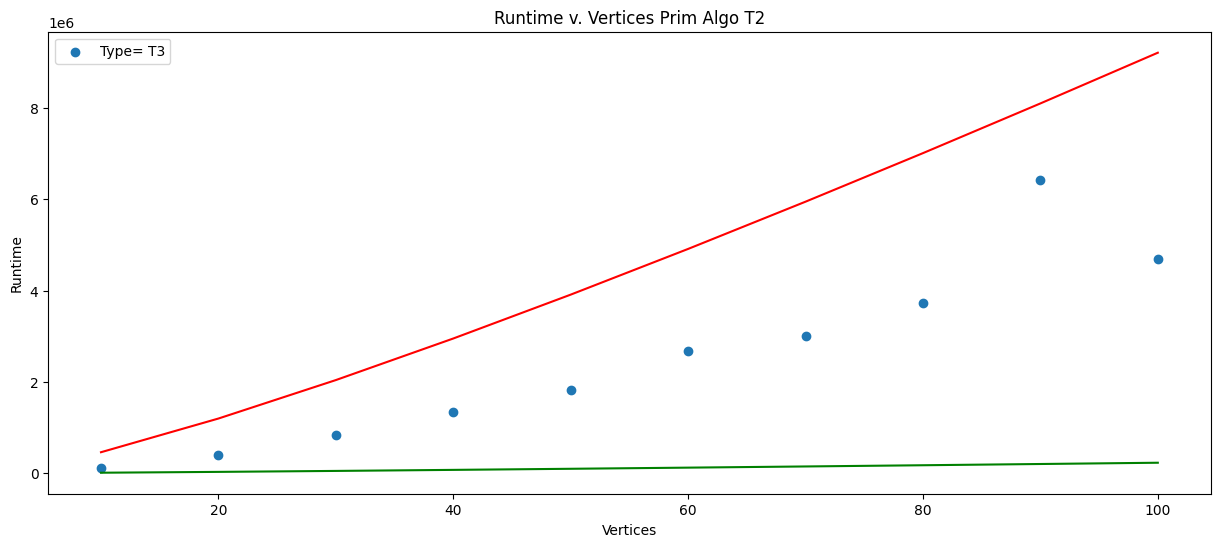

In [ ]:
n = [i*10 for i in range(1,11)]
upper_lim = []
lower_lim = []

for vertex in n:
  # v^2 log v scaled
  upper_lim.append(20000 * (vertex * math.log(vertex)))
  lower_lim.append(500 *(vertex * math.log(vertex)))

plt.figure(figsize = (15,6))
plt.xlabel('Vertices')
plt.ylabel('Runtime')
plt.title('Runtime v. Vertices Prim Algo T2')
plt.plot(n, upper_lim, color = 'red')
plt.plot(n, lower_lim, color = 'green')
plt.scatter(runtime_prim_t2.keys(), runtime_prim_t2.values(), label=f'Type= T3')
plt.legend()

Since T2 graphs are sparse (E in O(|V|)), runtime of Prim's algo for adjacency lists will run in Theta(|V|log(|v|)) which is seen here.

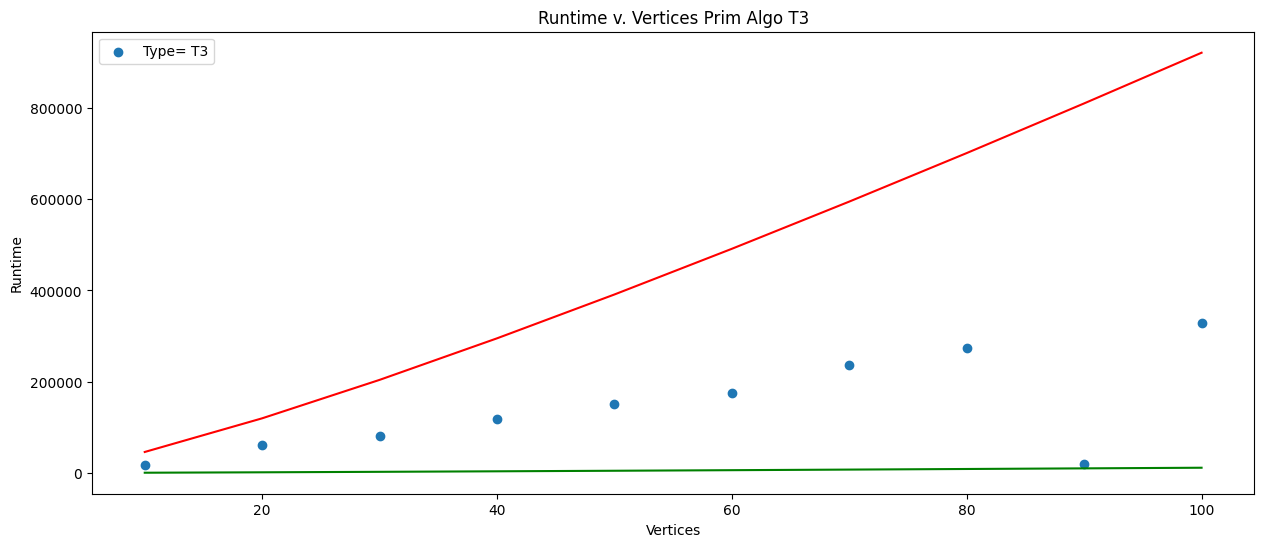

In [ ]:
n = [i*10 for i in range(1,11)]
upper_lim = []
lower_lim = []

for vertex in n:
  # v^2 log v scaled
  upper_lim.append(2000 * (vertex * math.log(vertex)))
  lower_lim.append(25 *(vertex * math.log(vertex)))

plt.figure(figsize = (15,6))
plt.xlabel('Vertices')
plt.ylabel('Runtime')
plt.title('Runtime v. Vertices Prim Algo T3')
plt.plot(n, upper_lim, color = 'red')
plt.plot(n, lower_lim, color = 'green')
plt.scatter(runtime_prim_t3.keys(), runtime_prim_t3.values(), label=f'Type= T3')
plt.legend()

Since T3 graphs are sparse (E in O(|V|)), runtime of Prim's algo for adjacency lists will run in Theta(|V|log(|v|)) which is seen here.

Now, Kruskal's algorithm. Remember that Kruskal's algorithm runs in |E| log |E| time. So we will be looking at plots with respect to edges.

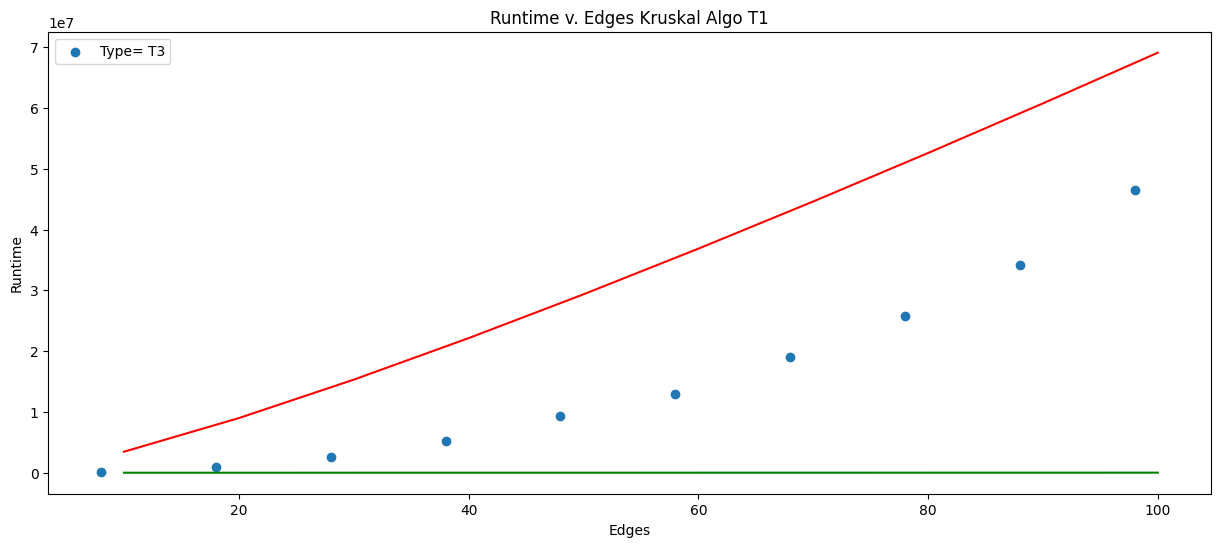

In [ ]:
n = [i*10 for i in range(1,11)]
upper_lim = []
lower_lim = []

for edge in n:
  # e log e scaled
  upper_lim.append(150000 * (edge * math.log(edge)))
  lower_lim.append(25 *(edge * math.log(edge)))
plt.figure(figsize = (15,6))
plt.xlabel('Edges')
plt.ylabel('Runtime')
plt.title('Runtime v. Edges Kruskal Algo T1')
plt.plot(n, upper_lim, color = 'red')
plt.plot(n, lower_lim, color = 'green')
plt.scatter(runtime_kruskal_t1.keys(), runtime_kruskal_t1.values(), label=f'Type= T3')
plt.legend()

We see here that the algo on T1 graphs in running in Theta(|E| log(|E|)) time.

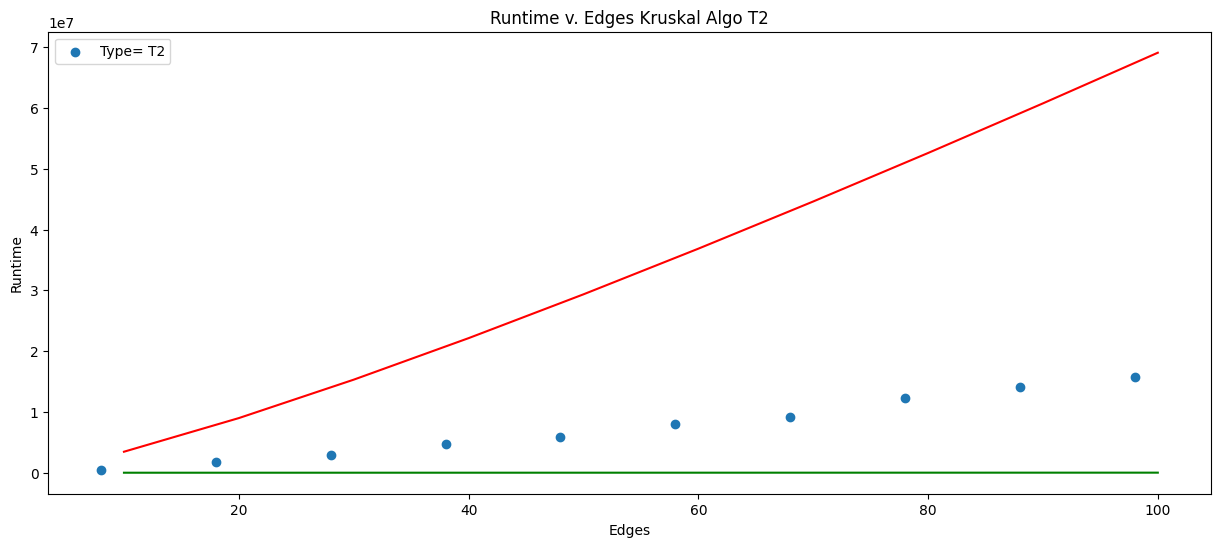

In [ ]:
n = [i*10 for i in range(1,11)]
upper_lim = []
lower_lim = []

for edge in n:
  #e log e scaled
  upper_lim.append(150000 * (edge * math.log(edge)))
  lower_lim.append(25 *(edge * math.log(edge)))
plt.figure(figsize = (15,6))
plt.xlabel('Edges')
plt.ylabel('Runtime')
plt.title('Runtime v. Edges Kruskal Algo T2')
plt.plot(n, upper_lim, color = 'red')
plt.plot(n, lower_lim, color = 'green')
plt.scatter(runtime_kruskal_t2.keys(), runtime_kruskal_t2.values(), label=f'Type= T2')
plt.legend()

We see here that the algo on T2 graphs in running in Theta(|E| log(|E|)) time.

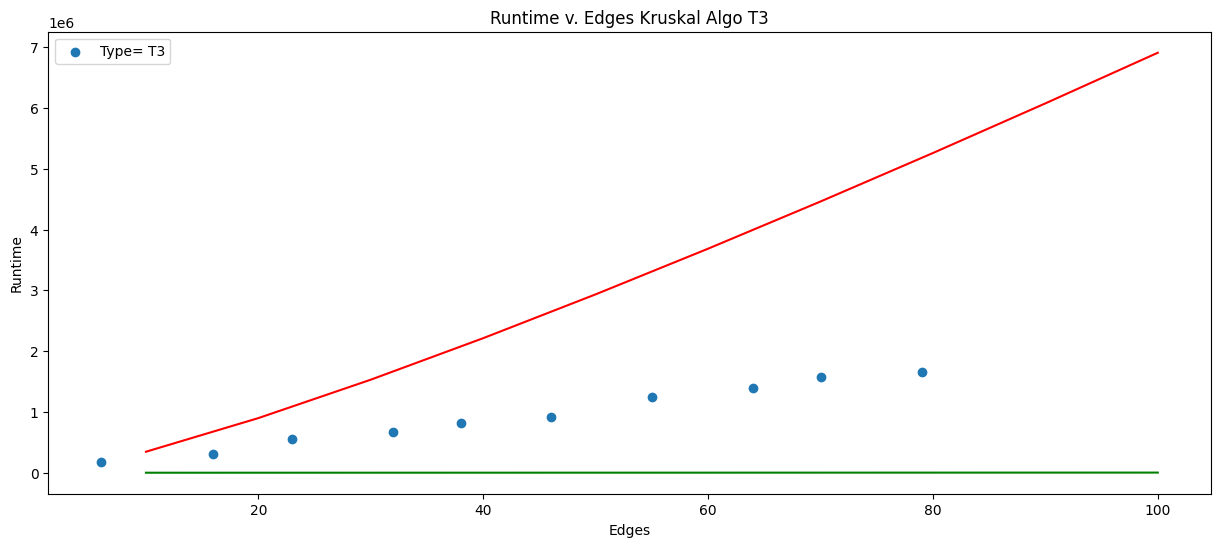

In [ ]:
n = [i*10 for i in range(1,11)]
upper_lim = []
lower_lim = []

for edge in n:
  #e log e scaled
  upper_lim.append(15000 * (edge * math.log(edge)))
  lower_lim.append(5 *(edge * math.log(edge)))

plt.figure(figsize = (15,6))
plt.xlabel('Edges')
plt.ylabel('Runtime')
plt.title('Runtime v. Edges Kruskal Algo T3')
plt.plot(n, upper_lim, color = 'red')
plt.plot(n, lower_lim, color = 'green')
plt.scatter(runtime_kruskal_t3.keys(), runtime_kruskal_t3.values(), label=f'Type= T3')
plt.legend()

We see here that the algo on T3 graphs in running in Theta(|E| log(|E|)) time.

Running Time